<a href="https://colab.research.google.com/github/juliogdomingues/jmr2024/blob/main/JMR_2024_LLM_Pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática de LLM


Material desenvolvido por Júlio Guerra Domingues, Thales Santos e Augusto Antunes para a JMR 2024.

In [1]:
!pip install -U -q google-generativeai

In [2]:
#Importações e configurações iniciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import google.generativeai as genai

In [4]:
# Instalar o gdown
!pip install gdown

# Baixar o arquivo usando o ID do arquivo
!gdown --id 1mRNyruPUXPwd-AP0bQSOFF9MJ6HaXcwK -O 'llm.txt'

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mRNyruPUXPwd-AP0bQSOFF9MJ6HaXcwK
To: /content/llm.txt
100% 39.0/39.0 [00:00<00:00, 160kB/s]


In [5]:
with open('/content/llm.txt', 'r') as file:
    chave = file.read().strip()

genai.configure(api_key=chave)

In [8]:
# Lista modelos de embedding
for m in genai.list_models():
  if 'embedContent' in m.supported_generation_methods:
    print(m.name)

models/embedding-001
models/text-embedding-004


In [9]:
#Listagem de documentos que serão buscados

# Textos do Compêndio de Radiologia: https://sites.google.com/site/compendiodaradiologia/home
DOCUMENT1 = {
    "Título": "Hemorragia intraparenquimatosa",
    "Conteúdo": "Presença de foco espontaneamente hiperatenuante (sangue) em região ____________, compatível com hematoma intraparenquimatoso agudo, associado a halo de edema adjacente, promovendo efeito expansivo caracterizado por desvio das estruturas da linha mediana para a _______ (direita/esquerda)."}

DOCUMENT2 = {
    "Título": "Sangramento subaracanoideo",
    "Conteúdo": "Conteúdo hiperdenso nas cisternas da base e que se insinua aos sulcos corticais frontoparietotemporais bilateralmente, sugerindo hemorragia subaracnoidea aguda."}

DOCUMENT3 = {
    "Título": "Hemorragia subdural",
    "Conteúdo": "Coleção subdural heterogênea, com focos hiperdensos de permeio, com espessura de 10 mm, relacionada a hematoma subdural."}


DOCUMENT4 = {
    "Título": "Atrofia",
    "Conteúdo": "Redução volumétrica do parênquima cerebral, com desproporcional comprometimento dos lobos temporais em relação ao acometimento do restante do parênquima encefálico, envolvendo as estruturas temporais mesiais de forma simétrica, pouco mais exuberante à esquerda."}


DOCUMENT5 = {
    "Título": "Alzheimer",
    "Conteúdo": "Destaca-se o comprometimento dos lobos temporais, desproporcional ao acometimento do restante do parênquima encefálico, envolvendo as estruturas temporais mesiais. Há sinais de afilamento cortical, com hipersinal nas sequências pesadas em T2, com perda da diferenciação córtico-subcortical."}

# Frases de propaganda de smartphone
DOCUMENT6 = {
    "Título": "Bateria o dia todo para jogar",
    "Conteúdo": "Com grande capacidade e maior eficiência energética, a bateria do Ultra oferece vida extra quando é mais importante, como a batalha épica com o chefão para a qual você está se preparando."}


DOCUMENT7 = {
    "Título": "Estrutura de titânio",
    "Conteúdo": "Uma proteção durável de titânio embutida diretamente na estrutura. A resistência do titânio agora está ao seu alcance. O Corning® Gorilla® Armor ajuda a proteger sua tela contra arranhões, mantendo seu dispositivo lindo."}

# Frases relacionadas a carros
DOCUMENT8 = {
    "Título": "Performance",
    "Conteúdo": "Seus 171 cv de potência, 250Nm de torque alinhados ao seu exclusivo sistema de controle de largada, resultam em um 0 a 100km/h em 8,2s."}

DOCUMENT9 = {
    "Título": "Motorização",
    "Conteúdo": "Motorização a diesel e muita capacidade Off-Road, com funcionalidades e tecnologias para ajudar nos terrenos mais difíceis."}

documents = [DOCUMENT1, DOCUMENT2, DOCUMENT3, DOCUMENT4, DOCUMENT5, DOCUMENT6, DOCUMENT7, DOCUMENT8, DOCUMENT9]

In [10]:
df = pd.DataFrame(documents)
df.columns = ["Titulo", "Conteudo"]
df

,Titulo,Conteudo
0,Hemorragia intraparenquimatosa,Presença de foco espontaneamente hiperatenuant...
1,Sangramento subaracanoideo,Conteúdo hiperdenso nas cisternas da base e qu...
2,Hemorragia subdural,"Coleção subdural heterogênea, com focos hiperd..."
3,Atrofia,"Redução volumétrica do parênquima cerebral, co..."
4,Alzheimer,Destaca-se o comprometimento dos lobos tempora...
5,Bateria o dia todo para jogar,Com grande capacidade e maior eficiência energ...
6,Estrutura de titânio,Uma proteção durável de titânio embutida diret...
7,Performance,"Seus 171 cv de potência, 250Nm de torque alinh..."
8,Motorização,Motorização a diesel e muita capacidade Off-Ro...


In [11]:
model = "models/text-embedding-004"

In [12]:
def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

In [13]:
df["Embeddings"] = df.apply(lambda row: embed_fn(row["Titulo"], row["Conteudo"]), axis=1)
df

,Titulo,Conteudo,Embeddings
0,Hemorragia intraparenquimatosa,Presença de foco espontaneamente hiperatenuant...,"[0.031165253, -0.0058443965, -0.05753611, -0.0..."
1,Sangramento subaracanoideo,Conteúdo hiperdenso nas cisternas da base e qu...,"[0.011197598, 0.036431678, -0.038166873, -0.02..."
2,Hemorragia subdural,"Coleção subdural heterogênea, com focos hiperd...","[0.0043321275, 0.0019922603, -0.075735115, -0...."
3,Atrofia,"Redução volumétrica do parênquima cerebral, co...","[0.0068275984, 0.040780045, -0.066805206, 0.02..."
4,Alzheimer,Destaca-se o comprometimento dos lobos tempora...,"[0.019200545, 0.022232005, -0.081974305, -0.01..."
5,Bateria o dia todo para jogar,Com grande capacidade e maior eficiência energ...,"[-0.021268448, 0.021315832, -0.031050643, -0.0..."
6,Estrutura de titânio,Uma proteção durável de titânio embutida diret...,"[-0.026856177, 0.0032746168, -0.020339642, -0...."
7,Performance,"Seus 171 cv de potência, 250Nm de torque alinh...","[-0.053584453, -0.02024792, -0.009093436, -0.0..."
8,Motorização,Motorização a diesel e muita capacidade Off-Ro...,"[-0.0536608, -0.031672515, -0.026996242, -0.04..."


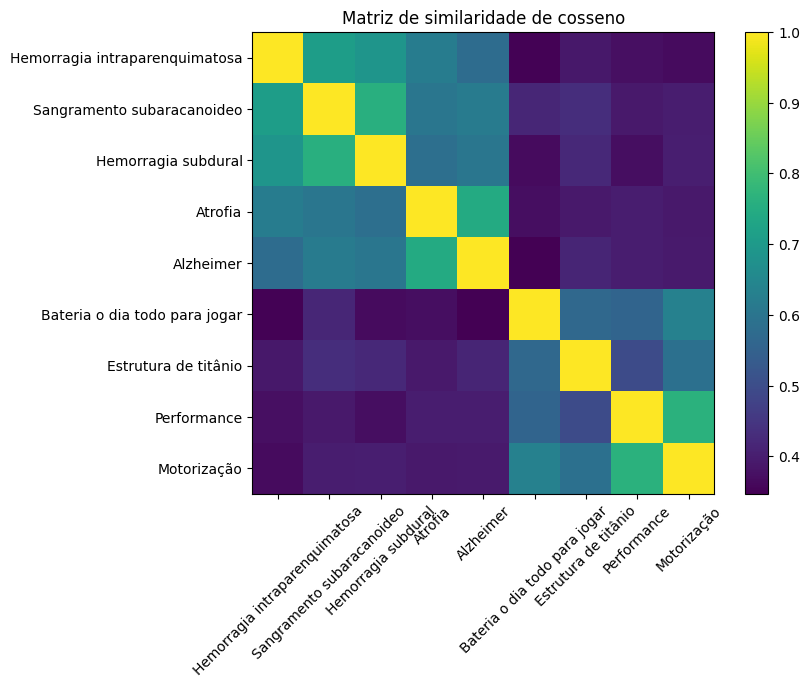

In [14]:
# Matriz de similaridade de cosseno
# A Similaridade de Cosseno é particularmente útil como medida de similaridade em Embeddings de palavras.
# Essa medida captura a orientação – ou direção – dos vetores, que é normalmente mais importante que a sua magnitude quando se fala de relação entre palavras.

# Calculate cosine similarity
def cosine_similarity(a, b):
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calculate similarity matrix
similarity_matrix = np.zeros((len(df), len(df)))
for i in range(len(df)):
  for j in range(len(df)):
    similarity_matrix[i, j] = cosine_similarity(df["Embeddings"][i], df["Embeddings"][j])

# Create a heatmap of the similarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap="viridis", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(df)), df["Titulo"], rotation=45)
plt.yticks(range(len(df)), df["Titulo"])
plt.title("Matriz de similaridade de cosseno")
plt.show()

Imagine que você esteja trabalhando com um dataset com 30 colunas numéricas. É claro que você não vai ser capaz de plotar essas informações em um gráfico, afinal só conseguimos enxergar em 3D, e o gráfico com as informações do dataset estaria em um espaço de dimensão 30! E aí que
está a primeira utilidade do PCA: visualização. A Análise de Componentes Principais é uma ótima ferramenta para conseguirmos visualizar essas informações em espaços de dimensão alta.

Referência: https://medium.com/turing-talks/seus-primeiros-passos-com-o-pca-ee411d4bc8d2

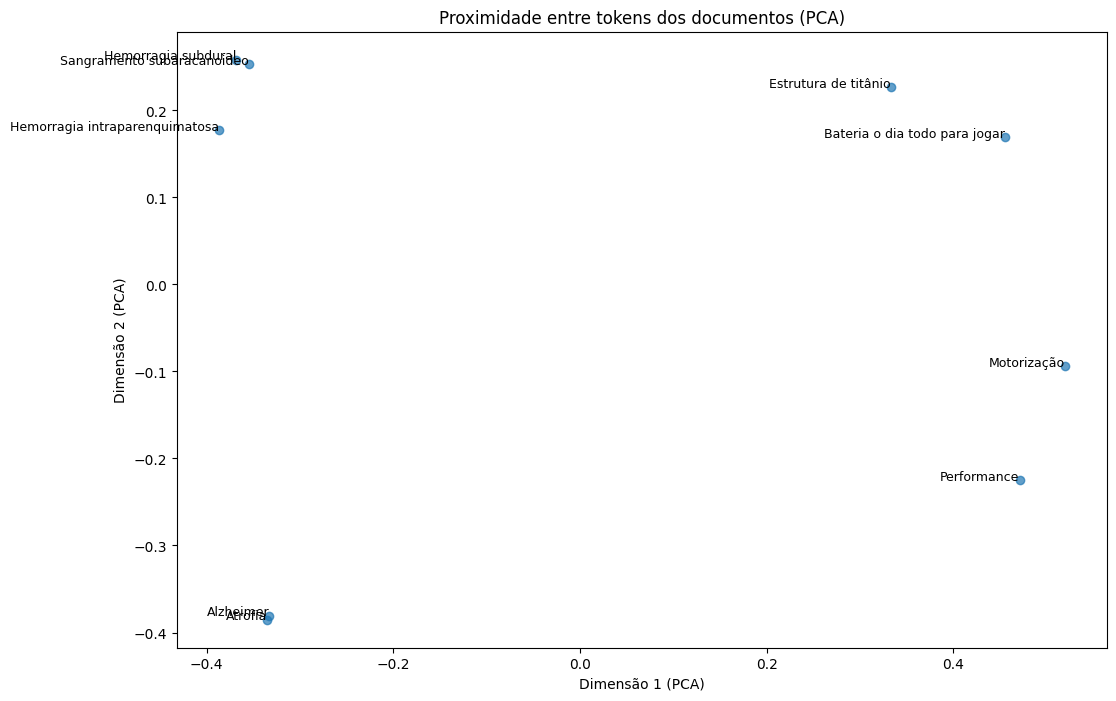

In [15]:
embeddings = np.vstack(df["Embeddings"])

# Redução de dimensionalidade usando PCA para visualização em 2D
pca = PCA(n_components=2, random_state=42)
reduced_embeddings = pca.fit_transform(embeddings)

# Plotando os tokens no espaço reduzido
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.7)

# Adicionando o rótulo de cada ponto no gráfico
for i, token in enumerate(df["Titulo"]):  # Substitua "Tokens" pelo nome da coluna de rótulos, se necessário
    plt.annotate(token, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, ha='right')

plt.title("Proximidade entre tokens dos documentos (PCA)")
plt.xlabel("Dimensão 1 (PCA)")
plt.ylabel("Dimensão 2 (PCA)")
plt.show()

In [16]:
def gerar_e_buscar_consulta(consulta, df, model):
    consulta_embedding = embed_fn("Consulta", consulta)

    similaridades = []
    for i in range(len(df)):
        similaridade = cosine_similarity(consulta_embedding, df["Embeddings"][i])
        similaridades.append(similaridade)

    indice_mais_similar = np.argmax(similaridades)

    return df["Conteudo"][indice_mais_similar]

In [17]:
# Podemos utilizar embeddings para encontrar conceitos "próximos", ainda que não saibamos exatamente do que se trata
consulta = "Paciente tem doença de Lewy. Qual a descrição mais próxima?"

trecho = gerar_e_buscar_consulta(consulta, df, model)
print(trecho)

Destaca-se o comprometimento dos lobos temporais, desproporcional ao acometimento do restante do parênquima encefálico, envolvendo as estruturas temporais mesiais. Há sinais de afilamento cortical, com hipersinal nas sequências pesadas em T2, com perda da diferenciação córtico-subcortical.


In [18]:
# configurações adicionais do modelo de linguagem
generation_config = {
  "temperature": 0,
  "candidate_count": 1
}

In [19]:
# Lista de modelos de linguagem
for m in genai.list_models():
    print(m.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/embedding-001
models/text-embedding-004
models/aqa


In [20]:
# Podemos modificar o texto e ainda manter o conteúdo sem alterações significativas. Pense em aplicações disso.
prompt = f"Reescreva esse texto de uma forma mais coloquial, sem adicionar informações que não façam parte do texto: {trecho}."

model_2 = genai.GenerativeModel("gemini-1.0-pro-latest",
                                generation_config={"temperature": 0.2, "candidate_count": 1})
response = model_2.generate_content(prompt)
print(response.text)

Os lobos temporais do cérebro estão bem afetados, mais do que o resto. As partes do meio desses lobos, chamadas de estruturas temporais mesiais, estão envolvidas. A casca do cérebro nessas áreas está ficando mais fina e aparecendo mais escura nas imagens de ressonância magnética. Além disso, a diferença entre a casca e a parte interna do cérebro está desaparecendo.


In [21]:
# Podemos utilizar modelos de linguagem para adaptar frases prontas utilizadas em laudos
def adaptar_frase(frase_padrao, contexto):
  """Adapta uma frase padrão com base no contexto fornecido.

  Args:
    frase_padrao: A frase padrão a ser adaptada.
    contexto: O contexto para o qual a frase deve ser adaptada.

  Returns:
    A frase adaptada ao contexto.
  """

  prompt = f"""
  Reescreva a seguinte frase, adaptando-a ao contexto fornecido:
  Frase padrão: {frase_padrao}
  Contexto: {contexto}
  A frase adaptada deve manter a estrutura original, modificando a lateralidade, medidas e informações que o usuário achar pertinente.
  Não acrescentar informações que não façam parte do {frase_padrao} ou {contexto}.
  """

  model_2 = genai.GenerativeModel("gemini-1.0-pro-latest", generation_config=generation_config)
  response = model_2.generate_content(prompt)

  return response.text

In [22]:
frase_padrao = "Cálculo obstrutivo no terço médio do ureter esquerdo, medindo 0,6 cm, com densidade média de 900 UH, determinando espessamento parietal do ureter e dilatação acentuada a montante. Associa-se densificação dos planos adiposos periureterais."
contexto = "Ureterolitíase distal à direita de 3 mm e densidade de 1000 UH, com dilatação moderada a montante, sem densificação"

frase_adaptada = adaptar_frase(frase_padrao, contexto)
print(frase_adaptada)

Cálculo obstrutivo no terço distal do ureter direito, medindo 3 mm, com densidade média de 1000 UH, determinando espessamento parietal do ureter e dilatação moderada a montante. Não se associa densificação dos planos adiposos periureterais.


In [23]:
contexto = input("Digite o contexto: ")

frase_adaptada = adaptar_frase(frase_padrao, contexto)
print(frase_adaptada)

Digite o contexto: teste
Cálculo obstrutivo no terço médio do ureter direito, medindo 0,8 cm, com densidade média de 1000 UH, determinando espessamento parietal do ureter e dilatação moderada a montante. Associa-se densificação dos planos adiposos perirrenais.


In [24]:
# Tais modelos também são úteis na adaptação de modelos de laudos a contextos específicos (do paciente, local, doença...)
generation_config = {
  "temperature": 0,
  "candidate_count": 1
}

modelo = """
TOMOGRAFIA COMPUTADORIZADA DO ABDOME E PELVE

TÉCNICA:

Exame realizado com cortes axiais obtidos sem a administração venosa do meio de contraste iodado, sem opacificação prévia do trato gastrointestinal.

RESULTADO:

Fígado de dimensões, contornos e coeficientes de atenuação habituais.

Não há sinais de dilatação das vias biliares intra ou extra-hepáticas.

Vesícula biliar de contornos regulares, sem evidência de cálculos densos.

Pâncreas com dimensões, contorno e densidade normais.

Baço de densidade homogênea e dimensões anatômicas .

Adrenais com forma, densidade e dimensões normais.

Rins tópicos, de contornos e dimensões normais, sem cálculos ou dilatação do sistema coletor.

Alças intestinais de distribuição usual, sem sinais aparentes de anormalidades focais.

Apêndice cecal de calibre preservado, sem sinais inflamatórios atuais.

Ausência de linfonodomegalias.

Aorta e veia cava inferior de calibre e trajeto normais.

Bexiga com boa capacidade e contornos regulares.

Vesículas seminais simétricas.

Próstata de dimensões conservadas, contornos regulares e densidade homogênea.

Loja uterina e anexos de configuração anatômica.

Não há evidências de líquido livre na cavidade peritoneal ou de processo expansivo pélvico.

CONCLUSÃO:

Exame de tomografia computadorizada do abdome total sem evidências de anormalidades expressivas ao método.
"""

def adaptar_modelo(modelo, genero):
  prompt = f"""
  Adapate o {modelo} de laudo radiológico fornecido, considerando o {genero} do paciente.
  Não acrescente informações, apenas retire as frases que referem ao sexo oposto ao informado.
  """

  model_2 = genai.GenerativeModel("gemini-1.0-pro-latest", generation_config=generation_config)
  response = model_2.generate_content(prompt)

  return response.text

In [25]:
modelo_adaptado = adaptar_modelo(modelo, "Masculino")
print(modelo_adaptado)

**TOMOGRAFIA COMPUTADORIZADA DO ABDOME**

**TÉCNICA:**

Exame realizado com cortes axiais obtidos sem a administração venosa do meio de contraste iodado, sem opacificação prévia do trato gastrointestinal.

**RESULTADO:**

Fígado de dimensões, contornos e coeficientes de atenuação habituais.

Não há sinais de dilatação das vias biliares intra ou extra-hepáticas.

Vesícula biliar de contornos regulares, sem evidência de cálculos densos.

Pâncreas com dimensões, contorno e densidade normais.

Baço de densidade homogênea e dimensões anatômicas.

Adrenais com forma, densidade e dimensões normais.

Rins tópicos, de contornos e dimensões normais, sem cálculos ou dilatação do sistema coletor.

Alças intestinais de distribuição usual, sem sinais aparentes de anormalidades focais.

Apêndice cecal de calibre preservado, sem sinais inflamatórios atuais.

Ausência de linfonodomegalias.

Aorta e veia cava inferior de calibre e trajeto normais.

Bexiga com boa capacidade e contornos regulares.

Vesíc

In [26]:
modelo_adaptado = adaptar_modelo(modelo, "Feminino")
print(modelo_adaptado)

**TOMOGRAFIA COMPUTADORIZADA DO ABDOME E PELVE**

**TÉCNICA:**

Exame realizado com cortes axiais obtidos sem a administração venosa do meio de contraste iodado, sem opacificação prévia do trato gastrointestinal.

**RESULTADO:**

Fígado de dimensões, contornos e coeficientes de atenuação habituais.

Não há sinais de dilatação das vias biliares intra ou extra-hepáticas.

Vesícula biliar de contornos regulares, sem evidência de cálculos densos.

Pâncreas com dimensões, contorno e densidade normais.

Baço de densidade homogênea e dimensões anatômicas.

Adrenais com forma, densidade e dimensões normais.

Rins tópicos, de contornos e dimensões normais, sem cálculos ou dilatação do sistema coletor.

Alças intestinais de distribuição usual, sem sinais aparentes de anormalidades focais.

Apêndice cecal de calibre preservado, sem sinais inflamatórios atuais.

Ausência de linfonodomegalias.

Aorta e veia cava inferior de calibre e trajeto normais.

Bexiga com boa capacidade e contornos regulares